<a href="https://colab.research.google.com/github/harshitkandpal/100_days_py_dev/blob/main/Copy_of_Disease_Prediction_from_Symptoms_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Raw Dataset
df = pd.read_excel('raw_data.xlsx')

In [3]:
df.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,NaN,NaN,UMLS:C0392680_shortness of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [4]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

<ipython-input-4-c3a2071c04ef>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


In [5]:
data.head(20)

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall
5,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0039070_syncope
6,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0042571_vertigo
7,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0038990_sweat^UMLS:C0700590_sweating inc...
8,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0030252_palpitation
9,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0027497_nausea


In [6]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

#['UMLS:C0012833', 'dizziness']

In [7]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():

    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [8]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [9]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [10]:
# Save cleaned data as CSV
f = open('cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [11]:
# Read Cleaned Data as DF
df = pd.read_csv('cleaned_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

,disease,symptom,occurence_count
0,hypertensive disease,shortness of breath,3363.0
1,hypertensive disease,dizziness,3363.0
2,hypertensive disease,asthenia,3363.0
3,hypertensive disease,fall,3363.0
4,hypertensive disease,syncope,3363.0


In [12]:
# Remove any rows with empty values
print(df.isna().sum().sum())
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

3


In [13]:
from sklearn import preprocessing

In [14]:
n_unique = len(df['symptom'].unique())
n_unique

404

In [15]:
df.dtypes

,0
disease,object
symptom,object
occurence_count,float64


In [16]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[328  87  28 ... 361 130 122]


In [17]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
for i in range(0,404):
  if(onehot_encoded[0][i] == 1):
    print(i)

328


In [20]:
len(onehot_encoded[0])

404

In [21]:
cols = np.asarray(df['symptom'].unique())
cols

array(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       'angina pectoris', 'pressure chest', 'polyuria', 'polydypsia',
       'pain chest', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       '

In [22]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts


In [23]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [24]:
df_ohe.head()

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
len(df_ohe)

2126

In [26]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

,disease
0,hypertensive disease
1,hypertensive disease
2,hypertensive disease
3,hypertensive disease
4,hypertensive disease


In [27]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [29]:
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
len(df_concat)

2097

In [31]:
cols = df_concat.columns
cols

Index(['disease', 'shortness of breath', 'dizziness', 'asthenia', 'fall',
       'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=405)

In [32]:
cols = cols[1:]

In [33]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HIV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pneumocystis carinii pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,accident cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acquired immuno-deficiency syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
len(df_concat)

149

In [35]:
df_concat.to_csv("training_dataset.csv", index=False)

In [36]:
# # One Hot Encoded Features
# X = df_concat[cols]
# print(len(X))

# # Labels
# y = df_concat['disease']
# print(len(y))

## Model Training

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [38]:
# Load the CSV file into a DataFrame
df = pd.read_csv('training_dataset.csv')

In [39]:
df.shape

(149, 405)

In [40]:
# Duplicate each row 200 times
df_duplicated = df.loc[df.index.repeat(200)].reset_index(drop=True)

In [41]:
# Save the duplicated DataFrame back to a new CSV file
df_duplicated.to_csv('training_data_duplicated.csv', index=False)

In [42]:
df_duplicated.shape

(29800, 405)

In [43]:
len(df_duplicated)

29800

In [44]:
# One Hot Encoded Features
X = df_duplicated[cols]
print(len(X))

# Labels
y = df_duplicated['disease']
print(len(y))

29800
29800


In [45]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
len(X_train), len(y_train)

(20860, 20860)

In [47]:
len(X_test), len(y_test)

(8940, 8940)

In [48]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
}

Accuracy of Decision Tree: 0.9724832214765101


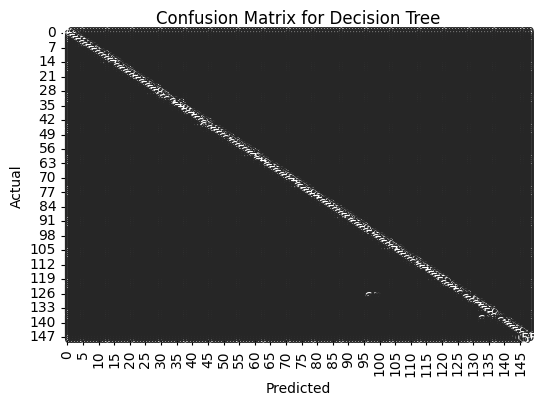

Accuracy of Random Forest: 0.9724832214765101


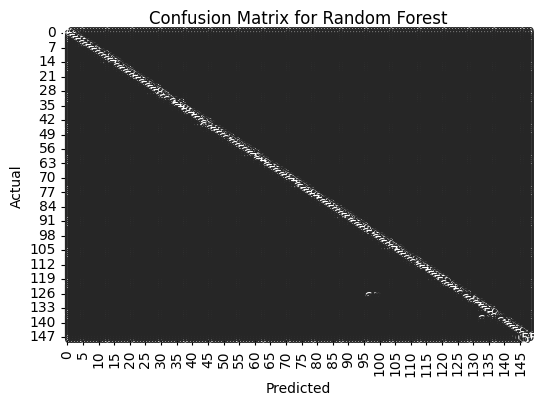

Accuracy of SVM: 0.9724832214765101


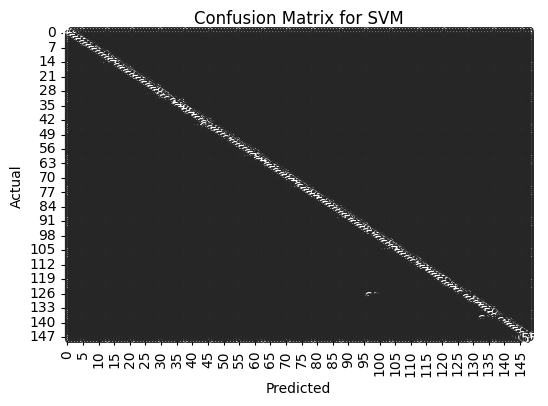

In [55]:
for model_name, model in models.items():

    tr = model.fit(X_train, y_train)


    y_pred = tr.predict(X_test)

    accuracy = tr.score(X_test, y_test)
    print(f"Accuracy of {model_name}: {accuracy}")

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

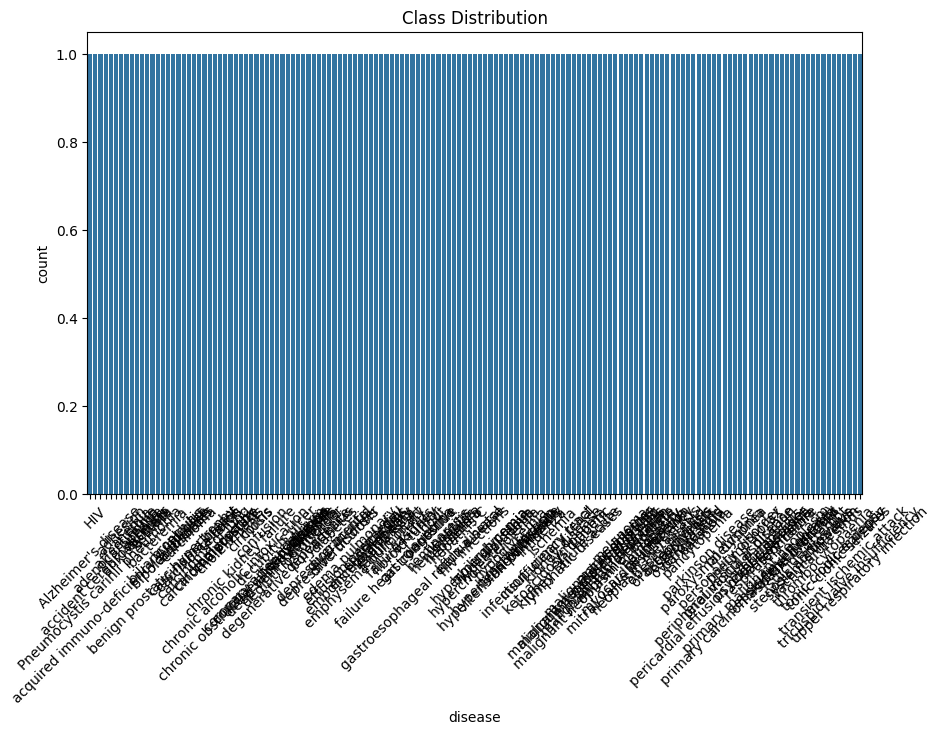

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_concat, x='disease')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [58]:
y_test.value_counts()

,count
disease,
pancreatitis,75
pneumonia aspiration,74
neoplasm,73
hernia hiatal,73
fibroid tumor,73
...,...
emphysema pulmonary,49
coronary heart disease,47
malignant tumor of colon,47


In [59]:
np.bincount(y_test)

ValueError: invalid literal for int() with base 10: 'hypoglycemia'

<ipython-input-57-8f3c5f2de989>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


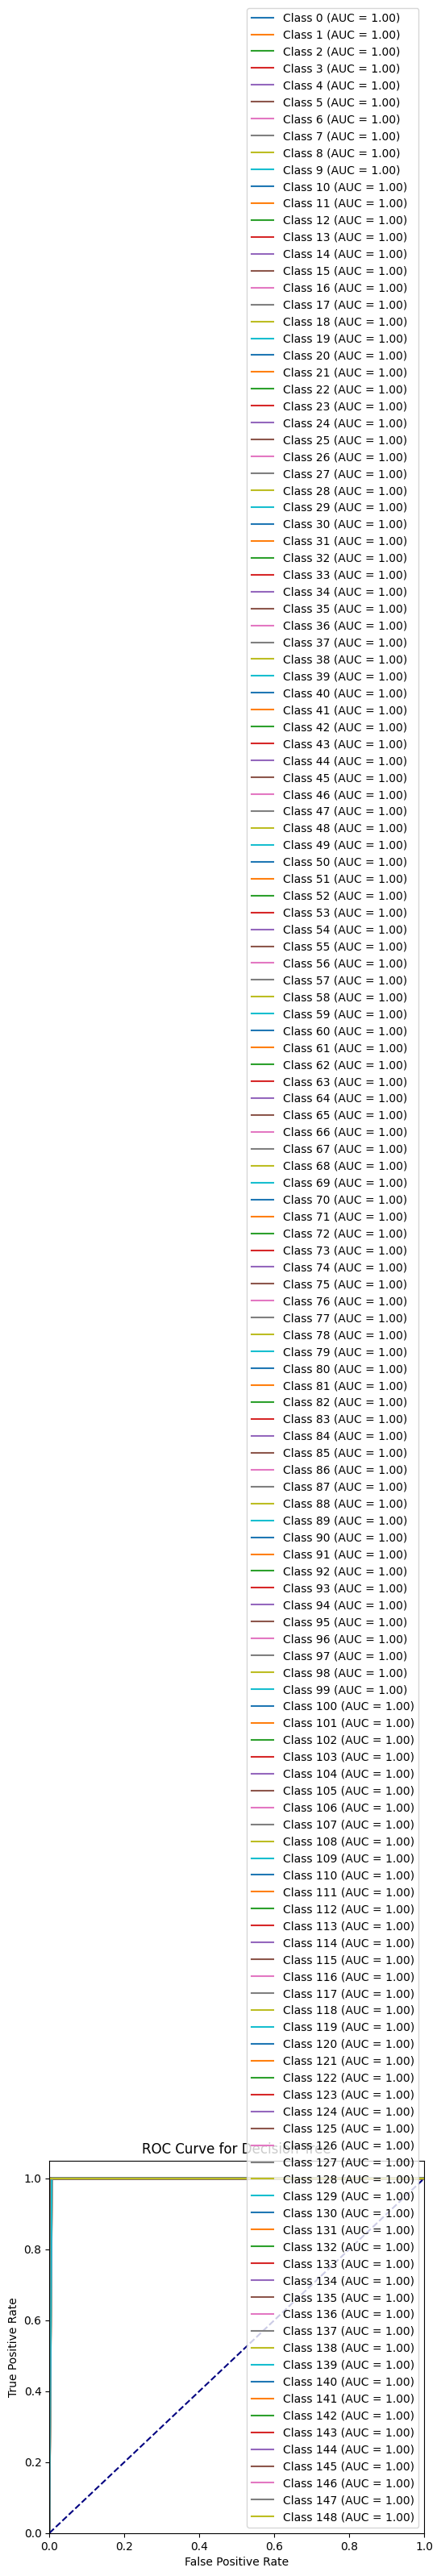

<ipython-input-57-8f3c5f2de989>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


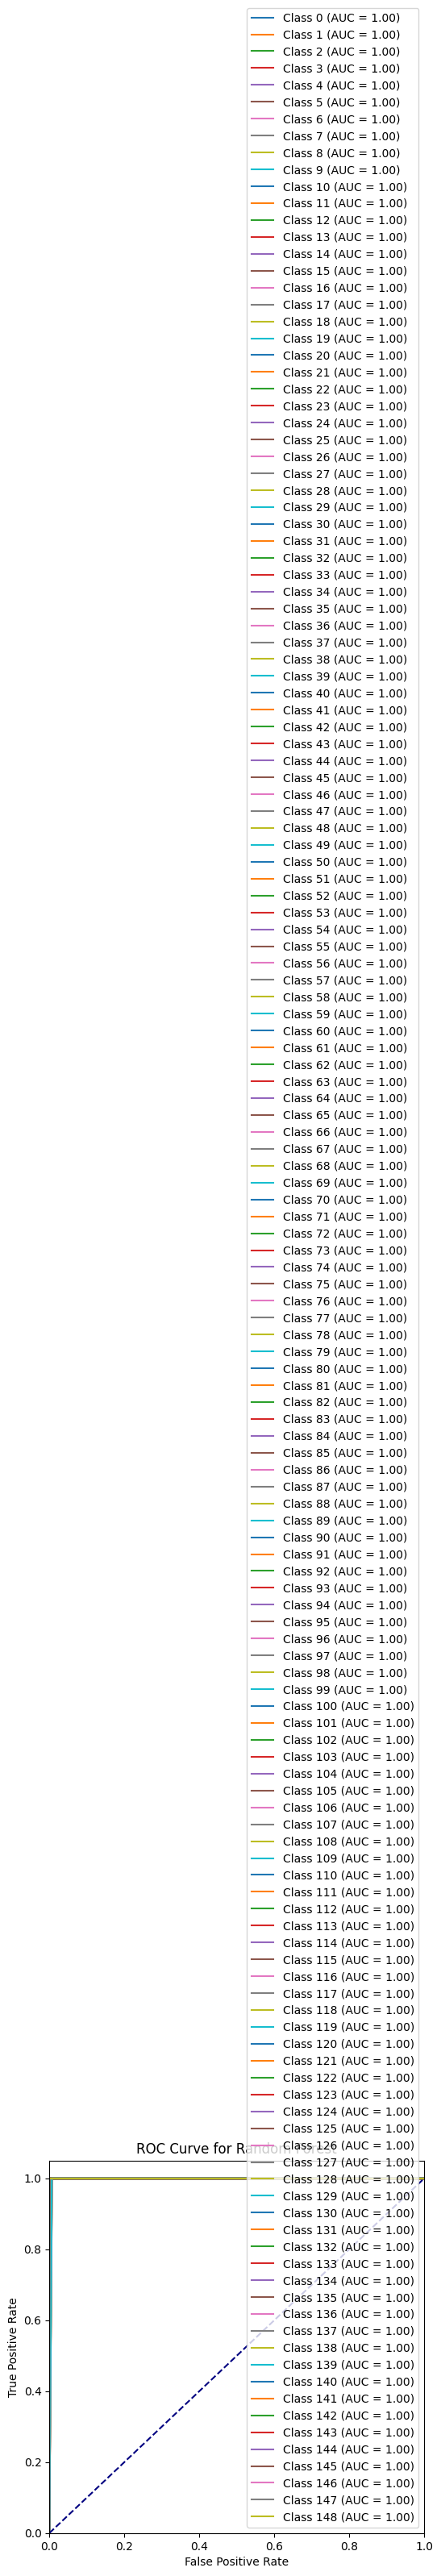

<ipython-input-57-8f3c5f2de989>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


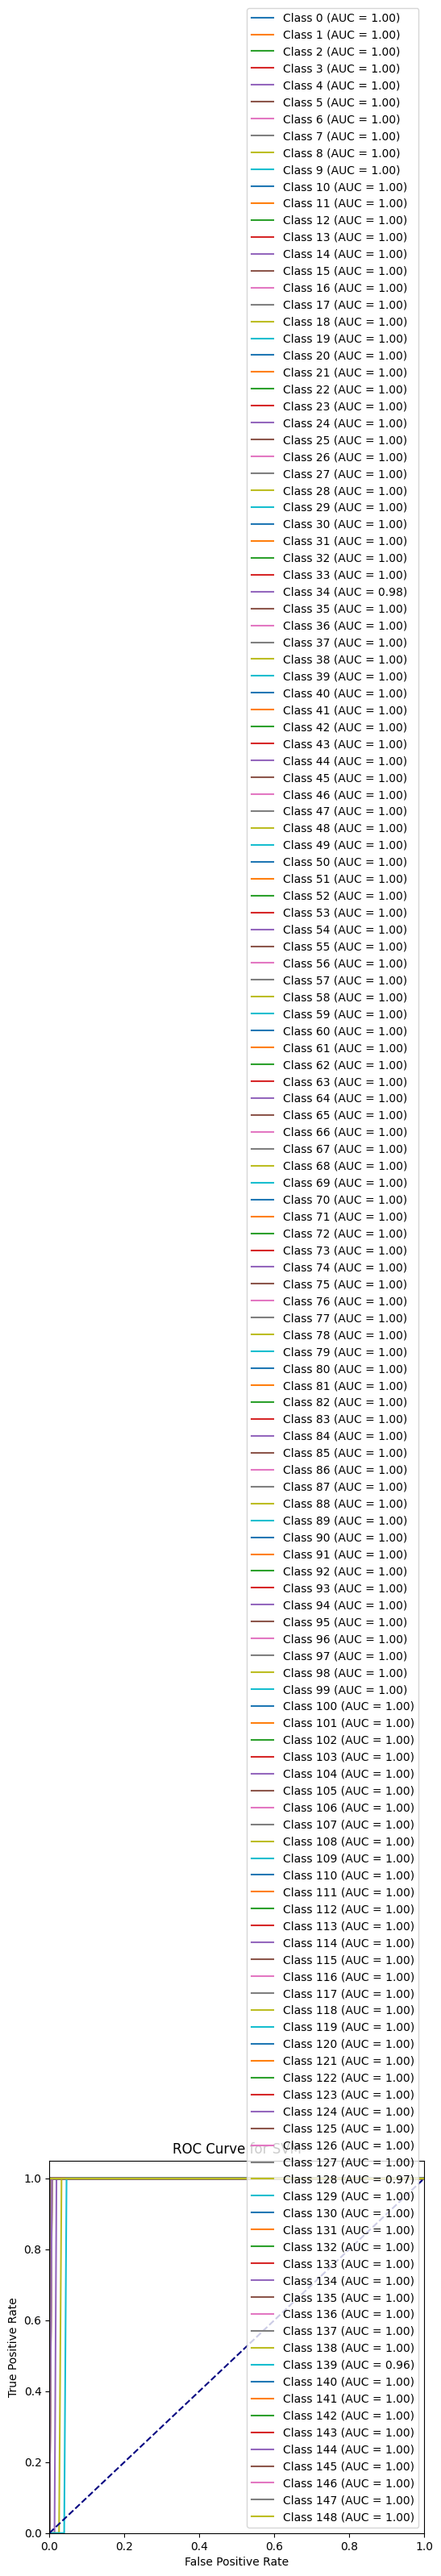

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multiclass (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Iterate over each model in the dictionary
for model_name, model in models.items():

    # Fit the model
    model.fit(X_train, y_train)

    # Use OneVsRestClassifier for multiclass handling
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)

    # Predict probabilities
    if hasattr(classifier, "predict_proba"):
        y_prob = classifier.predict_proba(X_test)
    else:
        y_prob = classifier.decision_function(X_test)

    # Plot ROC curve for each class
    plt.figure(figsize=(6, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report

# y_pred = model.predict(X_test)  # Assuming X_test is your test features
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [51]:
print(cols)

Index(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=404)


In [52]:
# input_symptoms_test = [
#     {
#         'drool': 1,
#         'agitation': 0,
#         'nightmare': 0,
#         'rhonchus': 0,
#         'consciousness clear': 1,
#         'pin-point pupils': 0,
#         'bedridden': 0,
#         'frail': 1,
#         'tremor resting': 0,
#         'hyperkalemia': 0,
#         'facial paresis': 0,
#         'groggy': 1,
#         'muscle twitch': 0,
#         'wheelchair bound': 0,
#         'cough': 0,
#         'fever': 0,
#     },
#     {
#         'drool': 0,
#         'agitation': 1,
#         'nightmare': 1,
#         'rhonchus': 1,
#         'consciousness clear': 0,
#         'pin-point pupils': 1,
#         'bedridden': 1,
#         'frail': 0,
#         'tremor resting': 1,
#         'hyperkalemia': 1,
#         'facial paresis': 1,
#         'groggy': 0,
#         'muscle twitch': 0,
#         'wheelchair bound': 1,
#         'cough': 1,
#         'fever': 1,
#     }
# ]

input_symptoms_test = [
    {
        'shortness of breath': 0,
        'dizziness': 0,
        'asthenia': 0,
        'fall': 0,
        'syncope': 0,
        'vertigo': 0,
        'sweat': 0,
        'sweating increased': 0,
        'palpitation': 0,
        'nausea': 0,
        'feces in rectum': 0,
        'prodrome': 0,
        'hypoproteinemia': 0,
        'alcohol binge episode': 0,
        'abdomen acute': 0,
        'air fluid level': 0,
        'catching breath': 0,
        'large-for-dates fetus': 0,
        'immobile': 0,
        'homicidal thoughts': 0,
        #
        'intoxication': 1,
        'hemiplegia': 1,
        'symptom aggravating factors': 1,
        'pain': 1,
        'hepatosplenomegaly': 1,
        'bedridden': 1,
        'headache': 1,
        'weight gain': 1,
        'decreased body weight':1,
        'gurgle': 1,
        'stinging sensation': 1,
        'urinary hesitation': 1,
        'pneumatouria': 1,
        'elation': 1,
        'charleyhorse': 1,
        'sedentary': 1,
        'air fluid level': 1
    },
    {
        'shortness of breath': 0,
        'dizziness': 1,
        'asthenia': 1,
        'fall': 1,
        'syncope': 0,
        'vertigo': 1,
        'sweat': 1,
        'sweating increased': 0,
        'palpitation': 1,
        'nausea': 1,
        'feces in rectum': 0,
        'prodrome': 0,
        'hypoproteinemia': 1,
        'alcohol binge episode': 0,
        'abdomen acute': 1,
        'air fluid level': 0,
        'catching breath': 1,
        'large-for-dates fetus': 0,
        'immobile': 1,
        'homicidal thoughts': 0
    }
]


for symptoms in input_symptoms_test:
    input_data = pd.DataFrame([symptoms])
    input_data = input_data.reindex(columns=cols, fill_value=0)
    prediction = model.predict(input_data)
    # print(f'{input_data}')
    print(f'Input Symptoms: {symptoms} => Predicted condition: {prediction[0]}')


Input Symptoms: {'shortness of breath': 0, 'dizziness': 0, 'asthenia': 0, 'fall': 0, 'syncope': 0, 'vertigo': 0, 'sweat': 0, 'sweating increased': 0, 'palpitation': 0, 'nausea': 0, 'feces in rectum': 0, 'prodrome': 0, 'hypoproteinemia': 0, 'alcohol binge episode': 0, 'abdomen acute': 0, 'air fluid level': 1, 'catching breath': 0, 'large-for-dates fetus': 0, 'immobile': 0, 'homicidal thoughts': 0, 'intoxication': 1, 'hemiplegia': 1, 'symptom aggravating factors': 1, 'pain': 1, 'hepatosplenomegaly': 1, 'bedridden': 1, 'headache': 1, 'weight gain': 1, 'decreased body weight': 1, 'gurgle': 1, 'stinging sensation': 1, 'urinary hesitation': 1, 'pneumatouria': 1, 'elation': 1, 'charleyhorse': 1, 'sedentary': 1} => Predicted condition: Alzheimer's disease
Input Symptoms: {'shortness of breath': 0, 'dizziness': 1, 'asthenia': 1, 'fall': 1, 'syncope': 0, 'vertigo': 1, 'sweat': 1, 'sweating increased': 0, 'palpitation': 1, 'nausea': 1, 'feces in rectum': 0, 'prodrome': 0, 'hypoproteinemia': 1, 'a

In [ ]:
# prediction_probabilities = model.predict_proba(input_data)
# print(f'Predicted probabilities: {prediction_probabilities}')
